In [2]:
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

import spacy
from spacy import displacy
from spacy.util import minibatch, compounding

from nltk.tokenize import WordPunctTokenizer
import re
from bs4 import BeautifulSoup

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Display 100 characters max within a cell
pd.set_option('max_colwidth',200)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Administrator/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/Administrator/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/Administrator/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
df = pd.read_csv('text_emotion.csv')

In [4]:
dfadd=pd.read_csv('AirlineSentiment.csv', header=0, encoding = 'ISO-8859-1',index_col=1)
dfadd.head()

,_unit_id,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
_golden,,,,,,,,,,,,,,,,,,,
False,681448150,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
False,681448153,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
False,681448156,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
False,681448158,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
False,681448159,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [5]:
dfadd=dfadd[['tweet_id','airline_sentiment','_unit_id','text']]
dfadd.reset_index(drop=True, inplace=True)
dfadd.head()

,tweet_id,airline_sentiment,_unit_id,text
0,5.703060e+17,neutral,681448150,@VirginAmerica What @dhepburn said.
1,5.703010e+17,positive,681448153,@VirginAmerica plus you've added commercials to the experience... tacky.
2,5.703010e+17,neutral,681448156,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,5.703010e+17,negative,681448158,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,5.703010e+17,negative,681448159,@VirginAmerica and it's a really big bad thing about it


In [6]:
dfadd.columns=['tweet_id','sentiment','author','content']
dfadd.head()

,tweet_id,sentiment,author,content
0,5.703060e+17,neutral,681448150,@VirginAmerica What @dhepburn said.
1,5.703010e+17,positive,681448153,@VirginAmerica plus you've added commercials to the experience... tacky.
2,5.703010e+17,neutral,681448156,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,5.703010e+17,negative,681448158,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,5.703010e+17,negative,681448159,@VirginAmerica and it's a really big bad thing about it


In [7]:
dfadd.index.value_counts()

2047     1
10912    1
6806     1
661      1
2708     1
        ..
11583    1
9534     1
13628    1
3387     1
0        1
Length: 14640, dtype: int64

In [8]:
dfadd.shape

(14640, 4)

In [9]:
dfnewadded = pd.concat([df, dfadd], ignore_index=True, sort =False)
dfnewadded.shape

(54640, 4)

In [26]:
dfnewadded.head(-10)

,tweet_id,sentiment,author,content
0,1.956967e+09,empty,xoshayzers,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[
1,1.956968e+09,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...
2,1.956968e+09,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1.956968e+09,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1.956968e+09,neutral,xkilljoyx,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will."
...,...,...,...,...
54625,5.695900e+17,positive,681679784,@AmericanAir Flight 236 was great. Fantastic cabin crew. A+ landing. #thankyou #JFK http://t.co/dRW08djHAI
54626,5.695890e+17,negative,681679785,@AmericanAir Flight 953 NYC-Buenos Aires has been delay since yesterday at 10PM. Is going to take off at 3.30PM now? Give us answers!
54627,5.695890e+17,negative,681679786,"@AmericanAir Flight Cancelled Flightled, can't go home until tomorrow. I could use dinner and a play, @AmericanAir! It's my first time in NYC."
54628,5.695890e+17,positive,681679787,"Thank you. ÛÏ@AmericanAir: @jlhalldc Customer Relations will review your concerns and contact you back directly, John.Û"


## first lets try model on the added data

## Data Understanding and Preprocessing

In [10]:
dfadd.isnull().sum()

tweet_id     0
sentiment    0
author       0
content      0
dtype: int64

No missing values

In [11]:
dfadd.content.duplicated().sum()

213

It looks like there are duplicated tweets (which could be retweets maybe) that needs to be taken into consideration

In [12]:
dfadd.content.value_counts()[dfadd.content.value_counts()>1]

@united thanks                                                                                                                                 6
@AmericanAir thanks                                                                                                                            5
@SouthwestAir sent                                                                                                                             5
@JetBlue thanks!                                                                                                                               5
@AmericanAir thank you!                                                                                                                        4
                                                                                                                                              ..
@AmericanAir is the new 9:45 time confirmed or it may get Cancelled Flightled? Traveling with kids, need to be certain. Thx       

In [13]:
dfadd=dfadd.drop_duplicates(subset='content')

In [14]:
dfadd.content.duplicated().sum()

0

Now lets see the distribution of emotions in the data set

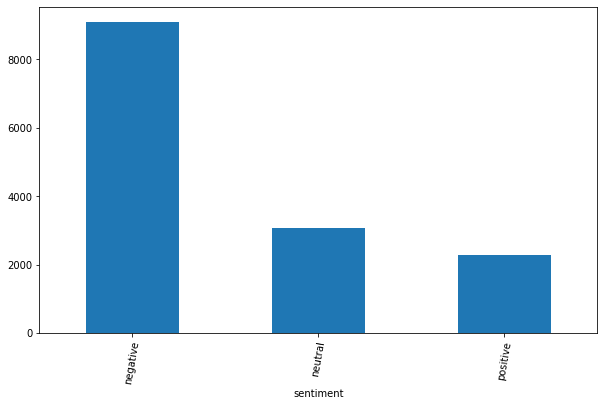

In [15]:
plt.subplots(figsize=(10,6))

dfadd.groupby('sentiment')['content'].count().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=80)
plt.show()

It looks like there are some html characters within the text such as:‘&amp’,’&quot’,etc. For decoding html to general text, beautiful soup can be used

In [16]:
def tweet_cleaner(tweet):
    
#     # To lowercase (not good for VADER)
#     tweet = tweet.lower()
    
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    
    #Convert @username to "@user"
    tweet = re.sub('@[^\s]+','@user',tweet)
    
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ')
    
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF')
    
    # Remove hyperlinks ->>>> For now just replace with http
    tweet = re.sub(r'https?:\/\/.*\/\w*', 'http', tweet)
    
#     # Remove tickers such as USD ($)
#     tweet = re.sub(r'\$\w*', '', tweet)
    
#     # Remove hashtags (not good for VADER)
#     tweet = re.sub(r'#\w*', '', tweet)
    
#     # Remove Punctuation and split 's, 't, 've with a space for filter
#     tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet)
    
#     # Remove words with 2 or fewer letters
#     tweet = re.sub(r'\b\w{1,2}\b', '', tweet)

    return tweet



# wordpunctok = WordPunctTokenizer()

# pat1 = r'@[A-Za-z0-9_]+'
# pat2 = r'https?://[^ ]+'

# combined_pat = r'|'.join((pat1, pat2))
# www_pat = r'www.[^ ]+'
# negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
#                 "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
#                 "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
#                 "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
#                 "mustn't":"must not"}
# neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

# def tweet_cleaner(text):
#     soup = BeautifulSoup(text, 'lxml')
#     souped = soup.get_text()
#     try:
#         quotRem = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
#     except:
#         quotRem = souped
#     stripped = re.sub(combined_pat, '', quotRem)
#     stripped = re.sub(www_pat, '', stripped)
#     lower_case = stripped.lower()
#     neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
#     letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)

#     words = [x for x  in wordpunctok.tokenize(letters_only) if len(x) > 1]
#     return (" ".join(words)).strip()

 

In [17]:

dfadd['Cleaned'] = dfadd.content.apply(tweet_cleaner)
dfadd.head(10)

,tweet_id,sentiment,author,content,Cleaned
0,5.703060e+17,neutral,681448150,@VirginAmerica What @dhepburn said.,@user What @user said.
1,5.703010e+17,positive,681448153,@VirginAmerica plus you've added commercials to the experience... tacky.,@user plus you've added commercials to the experience... tacky.
2,5.703010e+17,neutral,681448156,@VirginAmerica I didn't today... Must mean I need to take another trip!,@user I didn't today... Must mean I need to take another trip!
3,5.703010e+17,negative,681448158,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse","@user it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces they have little recourse"
4,5.703010e+17,negative,681448159,@VirginAmerica and it's a really big bad thing about it,@user and it's a really big bad thing about it
5,5.703010e+17,negative,681448162,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,@user seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,5.703010e+17,positive,681448165,"@VirginAmerica yes, nearly every time I fly VX this ÛÏear wormÛ wonÛªt go away :)","@user yes, nearly every time I fly VX this ÛÏear wormÛ wonÛªt go away :)"
7,5.703000e+17,neutral,681448167,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP","@user Really missed a prime opportunity for Men Without Hats parody, there. http"
8,5.703000e+17,positive,681448169,"@virginamerica Well, I didn'tÛ_but NOW I DO! :-D","@user Well, I didn'tÛ_but NOW I DO! :-D"
9,5.702950e+17,positive,681448171,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.","@user it was amazing, and arrived an hour early. You're too good to me."


### Removing the stopwords

In [18]:
stop = stopwords.words('english')
dfadd['Cleaned'] = dfadd['Cleaned'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
dfadd.head(10)

,tweet_id,sentiment,author,content,Cleaned
0,5.703060e+17,neutral,681448150,@VirginAmerica What @dhepburn said.,@user What @user said.
1,5.703010e+17,positive,681448153,@VirginAmerica plus you've added commercials to the experience... tacky.,@user plus added commercials experience... tacky.
2,5.703010e+17,neutral,681448156,@VirginAmerica I didn't today... Must mean I need to take another trip!,@user I today... Must mean I need take another trip!
3,5.703010e+17,negative,681448158,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse","@user really aggressive blast obnoxious ""entertainment"" guests' faces little recourse"
4,5.703010e+17,negative,681448159,@VirginAmerica and it's a really big bad thing about it,@user really big bad thing
5,5.703010e+17,negative,681448162,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,@user seriously would pay $30 flight seats playing. really bad thing flying VA
6,5.703010e+17,positive,681448165,"@VirginAmerica yes, nearly every time I fly VX this ÛÏear wormÛ wonÛªt go away :)","@user yes, nearly every time I fly VX ÛÏear wormÛ wonÛªt go away :)"
7,5.703000e+17,neutral,681448167,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP","@user Really missed prime opportunity Men Without Hats parody, there. http"
8,5.703000e+17,positive,681448169,"@virginamerica Well, I didn'tÛ_but NOW I DO! :-D","@user Well, I didn'tÛ_but NOW I DO! :-D"
9,5.702950e+17,positive,681448171,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.","@user amazing, arrived hour early. You're good me."


### Let's apply a common words filter for removing most common words 

In [19]:
import pickle

MIN_NUMBER_OF_SR = 1000
MIN_COM_WORDS = 0.05
MIN_UNCOM_WORDS = 0.05
UNCOM_WORDS = 0.05
dataframe = dfadd
pivot_feature = 'sentiment'
text_feature = 'Cleaned'

def common_word_filter (dataframe, pivot_feature, text_feature):
    
    NUM_OF_SUB_TECH = len(dataframe[pivot_feature].value_counts()[dataframe[pivot_feature].value_counts() > MIN_NUMBER_OF_SR].index.tolist())
    
    list_common = []
    
    list_uncommon =[]
    
    list_least_common = []
    
    for sub_tech in dataframe[pivot_feature].value_counts()[dataframe[pivot_feature].value_counts() > MIN_NUMBER_OF_SR].index.tolist():
        
        cleaned_text = [str(txt) for text in dataframe[dataframe[pivot_feature] == sub_tech][text_feature] for txt in text.split(' ') if len(txt) > 2 and txt not in ' ']
        
        word_dist = nltk.FreqDist(cleaned_text)
        
        list_common.append([x[0] for x in word_dist.most_common(int(len(word_dist)*MIN_COM_WORDS))])
        
        list_uncommon.append([x[0] for x in word_dist.most_common(len(word_dist))[-int(len(word_dist)*MIN_UNCOM_WORDS):]])
        
        list_least_common.append([x[0] for x in word_dist.most_common(len(word_dist))[-int(len(word_dist)*UNCOM_WORDS):]])
    
    list_common_fl = [x for y in list_common for x in y]
    
    list_uncommon_fl = [x for y in list_uncommon for x in y]
    
    word_dist_com = nltk.FreqDist(list_common_fl)
    
    word_dist_ucom = nltk.FreqDist(list_uncommon_fl)
    
    list_final_com = [x[0] for x in word_dist_com.most_common(len(list_common_fl)) if x[1] > NUM_OF_SUB_TECH*0.75]
    
    list_final_ucom = [x[0] for x in word_dist_ucom.most_common(len(list_uncommon_fl)) if x[1] < NUM_OF_SUB_TECH*0.25]
    
    final_list = list(set(list_final_com + list_final_ucom + [y for x in list_least_common for y in x]))
    
    with open('common_word_list_for_filtering.pickle', 'wb') as handle:
    
        pickle.dump(final_list, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    return final_list



In [20]:
final_list = common_word_filter(dfadd, 'sentiment','Cleaned')

In [21]:
len(final_list)

1923

In [22]:
len(dfadd.content)

14427

In [59]:
dfadd['Cleaned'] = dfadd['Cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_list)]))
dfadd.head()

,tweet_id,sentiment,author,content,Cleaned
0,5.703060e+17,neutral,681448150,@VirginAmerica What @dhepburn said.,said.
1,5.703010e+17,positive,681448153,@VirginAmerica plus you've added commercials to the experience... tacky.,plus added commercials experience... tacky.
2,5.703010e+17,neutral,681448156,@VirginAmerica I didn't today... Must mean I need to take another trip!,I today... Must mean I trip!
3,5.703010e+17,negative,681448158,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse","aggressive blast obnoxious ""entertainment"" guests' faces recourse"
4,5.703010e+17,negative,681448159,@VirginAmerica and it's a really big bad thing about it,big bad thing


In [24]:
dfadd.to_csv('additionalclean.csv',index=True)

### We can apply our first models to cleaned content

In [60]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(dfadd['Cleaned'],
                                                    dfadd['sentiment'],
                                                    test_size=.25, random_state=53)

### Count vectorizing

In [61]:
count_vect2 = CountVectorizer(ngram_range=(1,1), min_df=0.001, max_df=0.999)
count_vect_train2 = count_vect2.fit_transform(X_train2)
count_vect_train2 = count_vect_train2.toarray()
count_vect_test2 = count_vect2.transform(X_test2)
count_vect_test2 = count_vect_test2.toarray()

### Logistic Regression

In [62]:
logreg_CV2 = LogisticRegression(multi_class='multinomial', solver='newton-cg',class_weight='balanced',
                              C=1.0,n_jobs=-1, random_state=5)
logreg_CV2.fit(count_vect_train2, y_train2)
y_pred_lr_CV2 = logreg_CV2.predict(count_vect_test2)
print('Accuracy :', metrics.accuracy_score(y_test2, y_pred_lr_CV2))

Accuracy : 0.678957582478514


##  Linear SVC

In [63]:

Lsvc = LinearSVC()

Lsvc.fit(count_vect_train2, y_train2)

pred= Lsvc.predict(count_vect_test2)

metrics.accuracy_score(y_test2, pred)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7291377876351539

## Naive Bayes

In [64]:

from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()

nb_classifier.fit(count_vect_train2, y_train2)

pred = nb_classifier.predict(count_vect_test2)

metrics.accuracy_score(y_test2, pred)

0.7238702522872194

## Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf_CV = RandomForestClassifier(n_estimators = 200, random_state=5)
rf_CV.fit(count_vect_train2, y_train2)
y_pred_rf_CV = rf_CV.predict(count_vect_test2)
print('Accuracy :', metrics.accuracy_score(y_test2, y_pred_rf_CV))

Accuracy : 0.7011366786803438


## Tf-idf Vectorization¶

In [66]:
tfidf_vect = TfidfVectorizer(min_df=1, max_df=1.0, use_idf=True)
tfidf_vect_train = tfidf_vect.fit_transform(X_train2)
tfidf_vect_train = tfidf_vect_train.toarray()
tfidf_vect_test = tfidf_vect.transform(X_test2)
vocab = tfidf_vect.get_feature_names()
pd.DataFrame(np.round(tfidf_vect_train, 2), columns=vocab).head(10)

print('Longest word:', max(tfidf_vect.vocabulary_, key=len))

Longest word: invalid_loyalty_member_account_status


## Logreg after Tf-idf

In [68]:
logreg_TV = LogisticRegression(class_weight='balanced', random_state=5)
logreg_TV.fit(tfidf_vect_train, y_train2)
y_pred_lr_TV = logreg_TV.predict(tfidf_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test2, y_pred_lr_TV))
print (classification_report(y_test2, y_pred_lr_TV))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy : 0.7529803160521209
              precision    recall  f1-score   support

    negative       0.82      0.88      0.85      2267
     neutral       0.57      0.54      0.56       750
    positive       0.67      0.55      0.60       590

    accuracy                           0.75      3607
   macro avg       0.69      0.66      0.67      3607
weighted avg       0.75      0.75      0.75      3607



## Applying Deep Learning

In [71]:

import keras
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=2500,split=' ')
tokenizer.fit_on_texts(dfadd.Cleaned)

print(tokenizer.word_index)

{'i': 1, '2': 2, 'hours': 3, 'us': 4, 'hold': 5, 'flightled': 6, 'no': 7, 'flight': 8, '3': 9, 'help': 10, '4': 11, 'u': 12, '1': 13, 'it': 14, 'go': 15, 'delay': 16, 'you': 17, 'service': 18, '5': 19, 'minutes': 20, 'now': 21, 'told': 22, 'luggage': 23, 'can': 24, 'on': 25, 'w': 26, 'time': 27, 'dm': 28, 'my': 29, 'is': 30, 'ever': 31, 'worst': 32, 'we': 33, 'due': 34, 'someone': 35, 'thanks': 36, 'lost': 37, 'hrs': 38, 'how': 39, 'flighted': 40, 'days': 41, 'again': 42, 'seats': 43, 'response': 44, 'experience': 45, 'me': 46, 'why': 47, 'your': 48, 'email': 49, 'online': 50, 'aa': 51, 'and': 52, 'staff': 53, 'jfk': 54, '10': 55, 'bad': 56, 'passengers': 57, 'min': 58, 'customers': 59, 'in': 60, 'sitting': 61, 'line': 62, 'so': 63, 'said': 64, '30': 65, 'stuck': 66, 'reservation': 67, 'flights': 68, 'flightr': 69, 'plane': 70, 'miles': 71, 'delayed': 72, 'do': 73, '6': 74, 'yes': 75, 'yet': 76, 'nothing': 77, 'airlines': 78, 'delays': 79, 'says': 80, 'a': 81, 'hotel': 82, 'connection'

In [72]:
from keras.preprocessing.sequence import pad_sequences

X = tokenizer.texts_to_sequences(dfadd.Cleaned)
X = pad_sequences(X)
print(X)

[[   0    0    0 ...    0    0   64]
 [   0    0    0 ... 1023 2360   45]
 [   0    0    0 ...  404    1  345]
 ...
 [   0    0    0 ...    0  481   78]
 [   0    0    0 ...  121 1347    1]
 [   0    0    0 ...  512   11    8]]


In [73]:
Y = []
for val in dfadd.sentiment:
    if(val == 'positive'):
        Y.append([1,0,0])
    elif (val=='neutral'):
        Y.append([0,1,0])
    else:
        Y.append([0,0,1])
Y = np.array(Y)
print(Y)

[[0 1 0]
 [1 0 0]
 [0 1 0]
 ...
 [0 1 0]
 [0 0 1]
 [0 1 0]]


In [74]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X,Y,test_size=0.25)

In [75]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, LSTM

model = Sequential()
model.add(Embedding(2500,128,input_length=X.shape[1],dropout=0.2))
model.add(LSTM(300, dropout_U=0.2,dropout_W=0.2))
model.add(Dense(3,activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])




Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(300, dropout=0.2, recurrent_dropout=0.2)`
  


In [76]:
model.fit(X_tr ,y_tr, epochs=5,verbose=2,batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
 - 99s - loss: 0.7393 - acc: 0.6902
Epoch 2/5
 - 98s - loss: 0.5321 - acc: 0.7826
Epoch 3/5
 - 100s - loss: 0.4578 - acc: 0.8127
Epoch 4/5
 - 99s - loss: 0.3993 - acc: 0.8399
Epoch 5/5
 - 101s - loss: 0.3526 - acc: 0.8580


In [77]:
print(model.evaluate(X_ts,y_ts)[1])

3607/3607 [==============================] - 9s 2ms/step
0.7363459939172733


In [1]:
dfadd.head()

NameError: name 'dfadd' is not defined